In [24]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

Dataset link: https://www.kaggle.com/aniruddhachoudhury/creditcard-fraud-detection

In [25]:
data_df=pd.read_csv('creditcard.csv')

#### It contains 285,000 rows of data and 31 columns.
#### The most important columns are:
#### -- Time,
#### -- Amount,
#### -- and Class (fraud or not fraud).

#### data_df[‘Class’] = 0 Not a fraud transaction
#### data_df[‘Class’] = 1 Fraud transaction

In [4]:
data_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
data_df.shape


(284807, 31)

In [27]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [28]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [29]:
data_df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

### Percentage of total not fraud transaction

In [30]:
nfcount=0
notFraud=data_df['Class']
for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1

nfcount    
per_nf=(nfcount/len(notFraud))*100
print('Percentage of total not fraud transaction in the dataset: ',per_nf)

Percentage of total not fraud transaction in the dataset:  99.82725143693798


### Percentage of total fraud transaction

In [33]:
fcount=0
Fraud=data_df['Class']
for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount=fcount+1

fcount    
per_f=(fcount/len(Fraud))*100
print('Percentage of total fraud transaction in the dataset: ',per_f)

Percentage of total fraud transaction in the dataset:  0.1727485630620034


In [14]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=Fraud
plot_data['Genuine Transaction']=notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


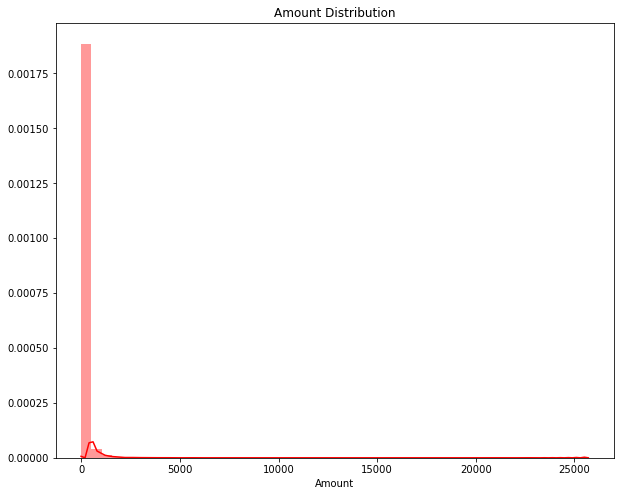

In [15]:
plt.figure(figsize=(10,8), )
plt.title('Amount Distribution')

sns.distplot(data_df['Amount'],color='red');

#### From this amount distribution curve it is shown that the number high amount transactions are very low. So there is a high probability for huge transactions to be fraudulent .

## OUTLIERS

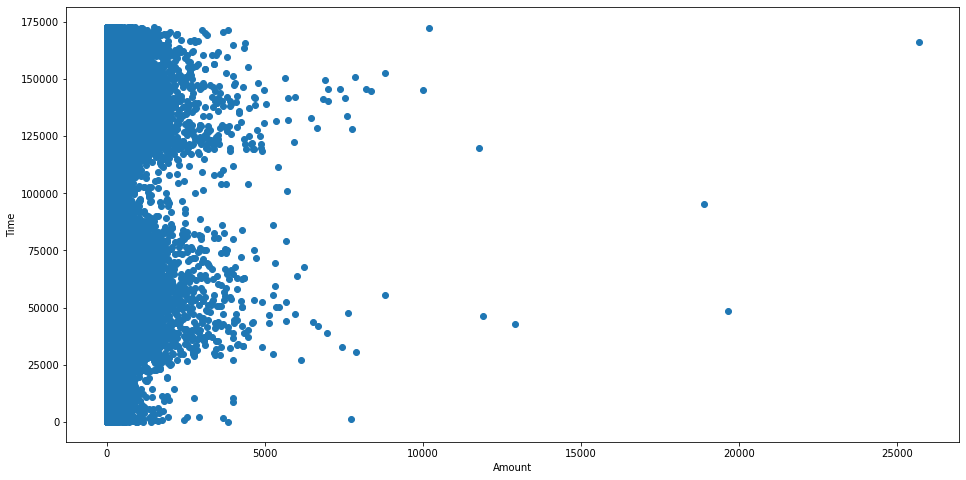

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'], data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

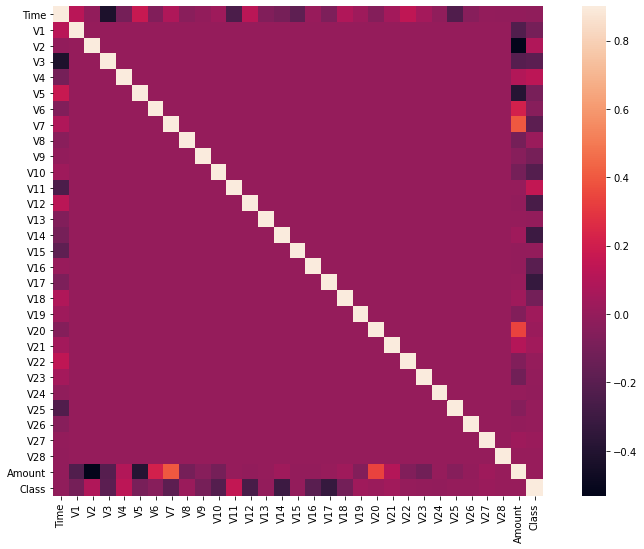

In [17]:
# Correlation matrix 
correlation_metrics = data_df.corr() 
fig = plt.figure(figsize = (14, 9)) 
sns.heatmap(correlation_metrics, vmax = .9, square = True) 
plt.show() 

#### Correlation metrics help us to understand the core relation between two attributes.

#### To start with modelling First we need to split the dataset
#### 80% → 80% of the data will use to train the model
#### 20% → 20% to validate the model

In [18]:
x=data_df.drop(['Class'], axis = 1)#drop the target variable
y=data_df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [19]:
logisticreg = LogisticRegression()
logisticreg.fit(xtrain, ytrain)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = logisticreg.predict(xtest)
accuracy= logisticreg.score(xtest,ytest)

In [22]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[56829    35]
 [   43    55]]


### Accuracy calculation

In [23]:
print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')

Accuracy score of the Logistic regression model:  99.86306660580738 %
